In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style('whitegrid')

In [3]:
import category_encoders as ce

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import tensorflow as tf

In [7]:
import keras
from keras.models import Model
import kerastuner

In [8]:
from sklearn import metrics

In [9]:
from keras.layers import Dense, Input, Dropout

## Keras notebook with clustering added
1. Plot PCA explained variance, pick a number of PCA dimensions to pass to NN.
1. Visualize 2D PCA of this dataset.
1. Conduct elbow and/or silhouette tests of the data reduced to various PCA dimensions.
1. Select an optimal clustering algorithm and hyperparameters and number of PCA dimensions to cluster on, then cluster.
1. Make cluster id a categorical feature, hot encode it.
1. Pass PCA dimensions and cluster id to three layer NN.
1. Tune the network & train up the best candidate.

In [10]:
tf_df = pd.read_csv('../train_features.csv',index_col='sig_id')
tts_df = pd.read_csv('../train_targets_scored.csv',index_col='sig_id')
tf_df['cp_type']=tf_df['cp_type'].astype('category')
scaler = MinMaxScaler(feature_range=(-0.5,0.5))
tf_df['cp_time']=scaler.fit_transform((np.array(tf_df['cp_time'])).reshape(-1,1))
tf_df['cp_dose']=tf_df['cp_dose'].astype('category')
transformer = StandardScaler()
tf_df.loc[:,'g-0':'c-99']=transformer.fit_transform(tf_df.loc[:,'g-0':'c-99'])

In [11]:
print(tf_df['cp_type'].unique(),tf_df['cp_dose'].unique())

['trt_cp', 'ctl_vehicle']
Categories (2, object): ['trt_cp', 'ctl_vehicle'] ['D1', 'D2']
Categories (2, object): ['D1', 'D2']


In [12]:
oenc = ce.ordinal.OrdinalEncoder()
tf_df = oenc.fit_transform(tf_df)
tf_df.sample(5)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_a21963499,1,0.0,1,-0.206526,-0.260500,-0.234577,0.023820,0.830616,0.166306,-0.370206,...,0.695367,0.165200,-0.015959,0.116723,0.453102,-0.292510,0.247070,-0.501156,0.385086,0.331493
id_e3bd8f784,1,-0.5,1,-0.239683,-1.264628,0.399674,-0.817977,0.123784,-0.394166,0.180693,...,-0.252822,0.251176,0.195415,-0.354929,0.045145,-0.276368,0.166038,0.199252,0.016543,0.243631
id_3a6b64518,1,0.5,1,-0.568239,0.097229,-1.023891,-0.955346,-0.127459,-1.936778,-1.723710,...,-1.567529,0.047351,-1.794872,-0.184740,-0.733445,-0.944771,-0.797461,0.174598,-1.065380,0.014067
id_484cbb788,1,-0.5,1,-0.844476,0.212205,-0.855600,-0.733660,-0.575297,-0.029562,0.797664,...,0.822439,0.298571,-0.527431,0.400626,0.372992,0.510310,0.072140,0.844834,0.330530,0.220192
id_bd44b33fd,1,0.0,1,-0.114447,0.228700,-0.444481,-0.253446,2.218507,0.156301,1.490339,...,0.363691,0.287995,0.483124,0.708305,0.540852,-0.304172,0.329461,0.507309,0.812220,0.783447


In [13]:
tf_df['cp_type']=tf_df['cp_type']-1
tf_df['cp_dose']=tf_df['cp_dose']-1
tf_df.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,0,-0.5,0,0.583933,0.804317,-0.386357,-0.739765,-0.243924,-0.740369,-1.198991,...,0.377638,0.352428,0.659876,0.499484,0.146278,0.621219,0.031745,0.347587,0.463460,0.510769
id_000779bfc,0,0.5,0,-0.124925,0.620898,0.141784,-0.022707,0.931772,0.559230,0.224552,...,0.021367,0.595227,0.491617,0.248281,0.371742,0.517798,0.298922,0.294874,0.587507,0.737704
id_000a6266a,0,0.0,0,0.272457,0.833861,1.353417,-0.166708,-0.086861,1.168288,0.153607,...,-0.127850,-0.082397,0.561309,0.247948,-0.378278,0.022296,-0.086525,0.093651,-0.511093,0.706452
id_0015fd391,0,0.0,0,-0.546995,-0.188856,-0.403446,0.470350,3.880216,-0.568667,-2.260896,...,-0.814697,-0.089447,-2.556236,-0.416627,-0.164899,-0.573436,-0.561987,-0.293593,0.045047,-0.365011
id_001626bd3,0,0.5,1,-0.411783,-0.375722,0.789552,0.642035,1.318373,-0.581300,-0.358079,...,0.236669,0.228262,0.589635,0.744707,0.490563,0.031073,0.278143,0.391377,0.049952,0.720231


1. Plot PCA explained variance.

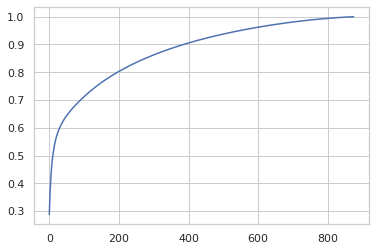

In [14]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(tf_df),index=tf_df.index)
var_explain = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_explain)
plt.show()

1. Pick a number of PCA dimension to pass as NN inputs:

In [15]:
var_explain[var_explain<0.6]

array([0.28775034, 0.32782045, 0.36001795, 0.38915401, 0.41040127,
       0.43118162, 0.44850562, 0.46499128, 0.47759148, 0.48873435,
       0.4990097 , 0.50816347, 0.51619619, 0.52375074, 0.53113156,
       0.5382704 , 0.54462608, 0.55056391, 0.55589954, 0.56097575,
       0.56532816, 0.56965964, 0.5737198 , 0.5775231 , 0.58112902,
       0.58458155, 0.58797941, 0.59125316, 0.59438609, 0.59741847])

Thirty is a surprisingly tractable number.

In [16]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
sig_id,,,,,,,,,,,,,,,,,,,,,
id_000644bb2,-7.107259,-1.168778,-0.310614,7.708409,-4.206789,-2.876220,2.219229,3.733861,-2.235870,-1.567758,...,-0.084736,-0.026212,0.031605,-0.263764,-0.086280,-0.098859,-0.105082,0.025546,-0.127693,0.157130
id_000779bfc,-6.361546,3.714502,7.178185,-4.380409,3.715265,3.302999,1.701060,0.001956,0.150894,1.241798,...,0.173947,-0.148990,0.103297,-0.281370,-0.210922,0.142719,-0.128665,0.015662,-0.100796,-0.173679
id_000a6266a,-1.731815,2.388899,-3.213443,-5.197731,0.391750,-1.006098,1.554354,-2.843535,0.268474,-3.741226,...,-0.167156,0.017084,0.165514,-0.069780,-0.144941,0.343237,-0.026656,0.052571,-0.037894,0.029508
id_0015fd391,9.183812,-2.753994,-5.093871,-8.610308,-4.969259,-6.347330,1.799940,-6.918809,-0.713619,4.037423,...,0.119759,-0.337072,0.247771,-0.249129,-0.185941,-0.461194,-0.197853,0.209215,0.192482,0.067413
id_001626bd3,-6.472174,1.019788,4.140000,-8.496081,-3.039038,-2.312408,-0.923099,0.415253,6.733137,4.569647,...,-0.301818,-0.322237,0.228351,0.021456,-0.265926,0.164691,-0.063793,0.038360,0.059974,0.017034


In [17]:
pca_df.columns

RangeIndex(start=0, stop=875, step=1)

2. Visualize 2D PCA of this dataset.

<AxesSubplot:xlabel='0', ylabel='1'>

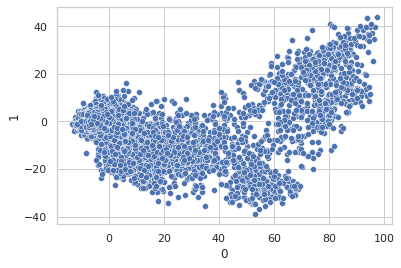

In [18]:
sns.scatterplot(x=pca_df[0],y=pca_df[1])

Hrmmmm... there might even be some clusters in that.

It seems to me that I should check the total range of the first several PCA columns and then shrink them to be proportional to the amount of variation those dimensions explain. I don't have any theoretical justification for this; it just sounds reasonable.

In [19]:
print(pca_df.loc[:,0:6].min(),'\n',pca_df.loc[:,0:6].max())

0   -13.264071
1   -39.080326
2   -27.349713
3   -36.893205
4   -24.195581
5   -24.178498
6   -35.158631
dtype: float64 
 0    97.329572
1    43.987695
2    41.765544
3    42.829925
4    31.531683
5    32.382433
6    45.266259
dtype: float64


In [20]:
ranges = pca_df.loc[:,0:6].max()-pca_df.loc[:,0:6].min()
ranges

0    110.593643
1     83.068021
2     69.115257
3     79.723130
4     55.727264
5     56.560931
6     80.424890
dtype: float64

They definitely do not taper evenly.

In [15]:
variances = pca.explained_variance_ratio_
top_var = variances[0]
scaled_variances = variances * 100 / top_var
scaled_variances[0:6]

array([100.        ,  13.92530325,  11.18938767,  10.12546597,
         7.3839208 ,   7.22165958])

In [22]:
print(pca_df.loc[:,0:6].min(),'\n',pca_df.loc[:,0:6].max())
pca_df.loc[:,0:6].max()-pca_df.loc[:,0:6].min()

0   -13.264071
1   -39.080326
2   -27.349713
3   -36.893205
4   -24.195581
5   -24.178498
6   -35.158631
dtype: float64 
 0    97.329572
1    43.987695
2    41.765544
3    42.829925
4    31.531683
5    32.382433
6    45.266259
dtype: float64


0    110.593643
1     83.068021
2     69.115257
3     79.723130
4     55.727264
5     56.560931
6     80.424890
dtype: float64

In [16]:
scaled_pca6 = pca_df.loc[:,0:6].copy()
for col in range(6):
    scaled_pca6.loc[:,col] = scaled_pca6.loc[:,col] * scaled_variances[col] / ranges[col]
print(scaled_pca6.loc[:,0:6].min(),'\n',scaled_pca6.loc[:,0:6].max())
scaled_pca6.loc[:,0:6].max()-scaled_pca6.loc[:,0:6].min()

NameError: name 'ranges' is not defined

3. Conduct elbow and/or silhouette tests of the data reduced to various PCA dimensions. (I semi-intentionally picked a maximum of 6.)

This calls for a gridsearch loop:
* Loop over dimensions 1 to 6
    * Loop over k = 1 to 10
        * KMeans
        * save scores and silhouette_scores
    * plot scores and silhouette_scores
    * DBSCAN, defaults
        * save score and silhouette_score
    * MeanShift, defaults
        * save score and silhouette_score
* Plot DBSCAN and MeanShift results

In [ ]:
del scaled_pca6[6]
scaled_pca6.head()

In [29]:
def plot_sil_scores(pca_input):
    k_sils = []
    d_sils = []
    m_sils = []
    for dim in range(1,6):
        k_sils.append([])
        data = pca_input.loc[:,0:dim-1].copy()
        for k in range(2,11):
            model = KMeans(n_clusters=k)
            model.fit(data)
            labels = model.labels_
            k_sils[dim-1].append(metrics.silhouette_score(data,labels))
        k_df = pd.DataFrame(k_sils,index=[f'd{i+1}' for i in range(len(k_sils))],
            columns=[f'k={k+2}' for k in range(len(k_sils[0]))]).T
        plt.title(f'KMeans in {dim} PCA dimensions')
        for col in list(k_df.columns):
            sns.scatterplot(x=range(2,11),y=k_df[col])
        plt.legend()
        plt.show()
        db = DBSCAN()
        db.fit(data)
        labels = db.labels_
        d_sils.append(metrics.silhouette_score(data,labels))
        ms = MeanShift()
        ms.fit(data)
        labels = ms.labels_
        m_sils.append(metrics.silhouette_score(data,labels))
    plt.title('DBSCAN results for varying PCA dimensions')
    sns.scatterplot(x=range(1,6),y=d_sils)
    plt.legend()
    plt.show()
    plt.title('Mean Shift results for varying PCA dimensions')
    sns.scatterplot(x=range(1,6),y=m_sils)
    plt.legend()
    plt.show()
    return k_sils, d_sils, m_sils

No handles with labels found to put in legend.


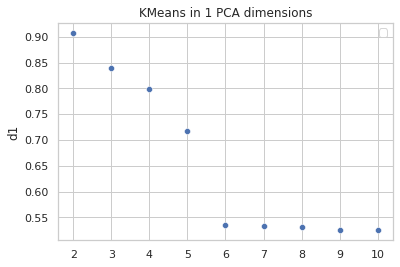

No handles with labels found to put in legend.


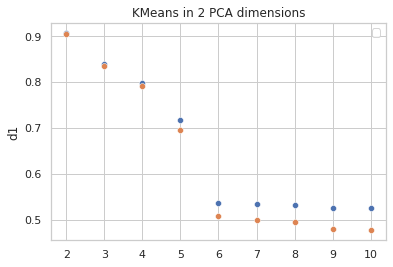

No handles with labels found to put in legend.


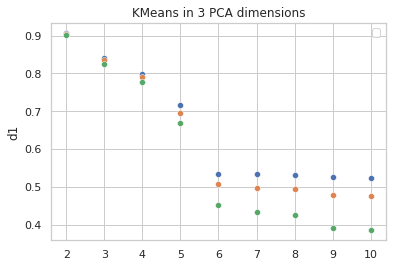

No handles with labels found to put in legend.


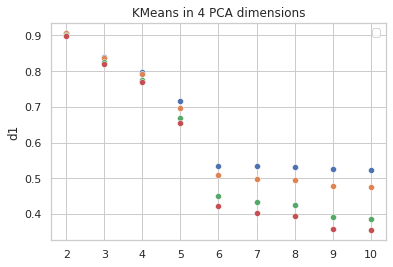

No handles with labels found to put in legend.


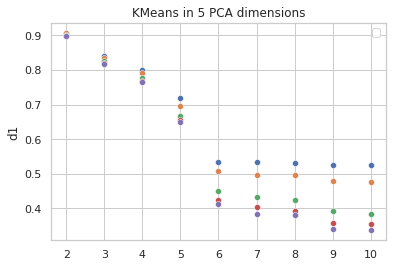

No handles with labels found to put in legend.


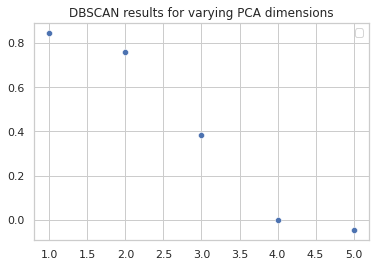

No handles with labels found to put in legend.


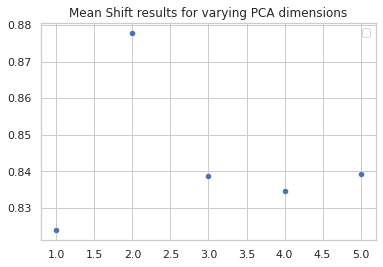

In [30]:
k_sils, d_sils, m_sils = plot_sil_scores(scaled_pca6)

In [31]:
k_df = pd.DataFrame(k_sils,index=[f'd{i+1}' for i in range(len(k_sils))],
                    columns=[f'k={k+2}' for k in range(len(k_sils[0]))]).T
k_df

,d1,d2,d3,d4,d5
k=2,0.907701,0.905620,0.901629,0.899602,0.898656
k=3,0.840075,0.835749,0.824947,0.820743,0.818225
k=4,0.798806,0.792007,0.776689,0.768718,0.765935
k=5,0.717975,0.696095,0.668389,0.654706,0.650776
k=6,0.535339,0.508561,0.451603,0.423260,0.412728
k=7,0.533575,0.497871,0.433898,0.403568,0.384955
k=8,0.532047,0.495445,0.424944,0.393533,0.381073
k=9,0.525096,0.479661,0.392397,0.358474,0.341308
k=10,0.524647,0.476193,0.385195,0.354258,0.336414


Let me check what happens when I just pass the raw PCA to the clusterer.

No handles with labels found to put in legend.


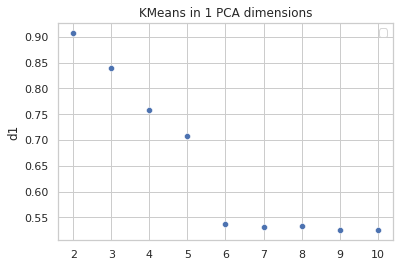

No handles with labels found to put in legend.


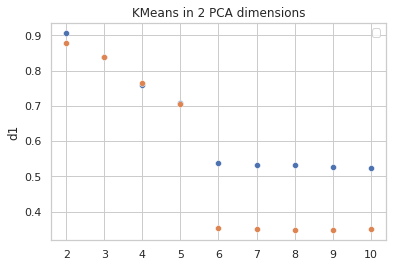

No handles with labels found to put in legend.


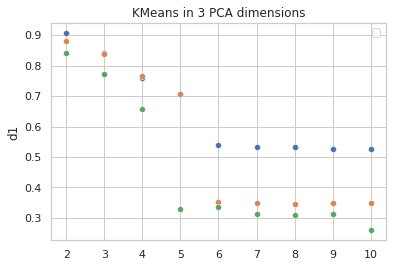

No handles with labels found to put in legend.


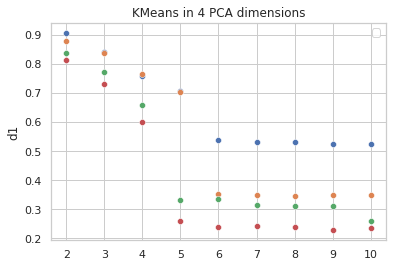

No handles with labels found to put in legend.


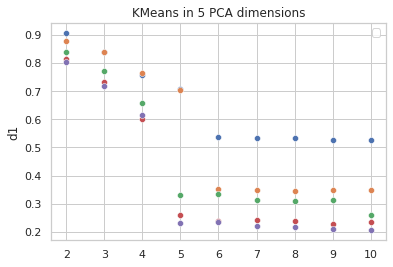

No handles with labels found to put in legend.


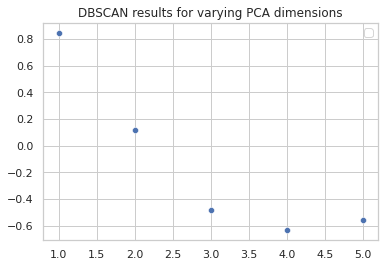

No handles with labels found to put in legend.


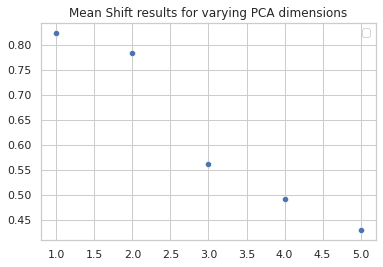

In [32]:
k2, d2, m2 = plot_sil_scores(pca_df)

Mean Shift looks like the most promising algorithm here. I can take some steps to speed it up by
1. calculating `estimate_bandwidth` ahead of time in an optimized fashion, using less than all the points
1. using bin seeding with a cutoff number of points for bins
1. setting n_jobs=2 (3 or higher I expect will break my 4-core machine)

In [35]:
bw = []
for dim in range(1,7):
    bw.append(estimate_bandwidth(scaled_pca6.loc[:,0:dim-1],quantile=0.5,n_samples=1000,n_jobs=2))
    print(f'Bandwidth for {dim} dimensions is {bw[-1]}\n')

Bandwidth for 1 dimensions is 6.140993474077628

Bandwidth for 2 dimensions is 6.203362341232365

Bandwidth for 3 dimensions is 6.421802506858066

Bandwidth for 4 dimensions is 6.543295133853511

Bandwidth for 5 dimensions is 6.591527651937368

Bandwidth for 6 dimensions is 6.661549341989982



Let me deliberately plan out how I will gridsearch, save models, and plot the metrics for each hyperparameter choice in [ #dims, ...] well, I guess I could fiddle with the bandwidth, [ 1/3, nominal, 3x ]. I could also recalculate the bandwidth at different quantiles...

In [17]:
bw30 = []
for dim in range(1,7):
    # quantile = 0.3 is the default
    bw30.append(estimate_bandwidth(scaled_pca6.loc[:,0:dim-1],quantile=0.3,n_samples=1000,n_jobs=2))
    print(f'Bandwidth for {dim} dimensions is {bw30[-1]}\n')

Bandwidth for 1 dimensions is 5.790471904877106

Bandwidth for 2 dimensions is 7.339769981251628

Bandwidth for 3 dimensions is 9.532310771558953

Bandwidth for 4 dimensions is 11.338723659210908

Bandwidth for 5 dimensions is 12.222327848948535

Bandwidth for 6 dimensions is 13.286100045708617



In [38]:
bw80 = []
for dim in range(1,7):
    # quantile = 0.3 is the default
    bw80.append(estimate_bandwidth(scaled_pca6.loc[:,0:dim-1],quantile=0.8,n_samples=1000,n_jobs=2))
    print(f'Bandwidth for {dim} dimensions is {bw80[-1]}\n')

Bandwidth for 1 dimensions is 8.44176225731409

Bandwidth for 2 dimensions is 8.489214574856891

Bandwidth for 3 dimensions is 8.618164810712285

Bandwidth for 4 dimensions is 8.695545166637151

Bandwidth for 5 dimensions is 8.734472820312549

Bandwidth for 6 dimensions is 8.794040475802609



I want
* a plot of silhouette scores per number of PCA dimensions clustered
* a different color and legend entry for each bandwidth quantile
* I will need to fit a MeanShift model at each of these combinations
    * save the model
        * perhaps in a two-layer dictionary with bw -> #dims
    * save the silhouette score
        * preferably in a dataframe with column labels `bw30, bw50, bw80`

In [40]:
ms_models = {}
ms_sils = {}
bws = ['bw30','bw50','bw80']
for i, bwq in enumerate([bw30, bw, bw80]):
    bw_lbl = bws[i]
    ms_models[bw_lbl]={}
    ms_sils[bw_lbl]=[]
    for dim in range(1,7):
        data = scaled_pca6.loc[:,0:dim-1].copy()
        ms_models[bw_lbl][dim]=MeanShift(bandwidth=bwq[dim-1],
                                    bin_seeding=True,
                                    min_bin_freq=10,
                                    n_jobs=2).fit(data)
        labels = ms_models[bw_lbl][dim].labels_
        ms_sils[bw_lbl].append(metrics.silhouette_score(data,labels))
mssil_df = pd.DataFrame(ms_sils,index=range(1,7))

In [20]:
# alternative code
data = np.array(scaled_pca6.loc[:,0].copy())
ms30_model = MeanShift(bandwidth=bw30[0],
                                    bin_seeding=True,
                                    min_bin_freq=10,
                                    n_jobs=2).fit(data.reshape(-1,1))

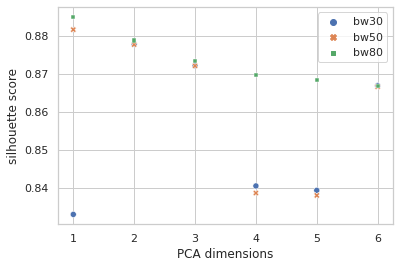

In [44]:
plt.xlabel('PCA dimensions')
plt.ylabel('silhouette score')
sns.scatterplot(data=mssil_df)
plt.show()

I should really store the number of clusters for each model; that's interesting, too. For a given silhouette score, more clusters presumably means more data for the neural net to use.

In [46]:
ms_clusts = {}
for bw_lbl in bws:
    ms_clusts[bw_lbl] = []
    for dim in range(1,7):
        ms_clusts[bw_lbl].append(len(ms_models[bw_lbl][dim].cluster_centers_))
msclusts_df = pd.DataFrame(ms_clusts,index=range(1,7))

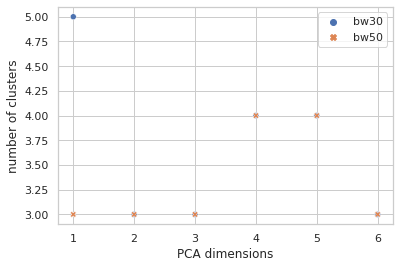

In [52]:
plt.xlabel('PCA dimensions')
plt.ylabel('number of clusters')
sns.scatterplot(data=msclusts_df.loc[:,'bw30':'bw50'])
plt.show()

In [25]:
# plot 2d rep with cluster colored
plot_df = pca_df.loc[:,0:1].copy()
plot_df['cluster']=ms30_model.labels_
plot_df.shape

(23814, 3)

<AxesSubplot:xlabel='0', ylabel='1'>

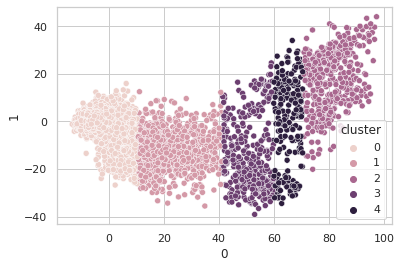

In [27]:
sns.scatterplot(x=plot_df[0],y=plot_df[1],hue='cluster',data=plot_df)

I will gladly take that minor silhouette score hit to go from three to five clusters.

I wonder how many points are orphaned?

In [49]:
labels = pd.Series(ms_models['bw30'][1].labels_)
labels[labels==-1].count()

0

In [51]:
labels.value_counts()

0    21808
1      984
2      448
3      358
4      216
dtype: int64

4. Totally have the model hyperparameters selected and model built.
5. Hot encode the cluster labels. Definitely want to drop a feature so that these columns are not mutually collinear, and it seems reasonable to drop cluster 0 and regard the small clusters as 'flavor' (or is that 'flava').
6. Merge the encoded cluster labels with the chosen number of PCA dimensions (30).
    * I will need to restandardize the first 30 PCA columns. Hmmm. How did those features get so big? More math that I have yet to explore.

In [55]:
ohenc = OneHotEncoder(drop='first',sparse=False,dtype=np.int)
cats = ohenc.fit_transform(np.array(labels).reshape(-1,1))
cats[:5,:]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [56]:
pca_scaler = StandardScaler()
pca_sc = pca_scaler.fit_transform(pca_df)
print(cats.shape,pca_sc.shape)

(23814, 4) (23814, 875)


In [57]:
tf_arr = np.concatenate((cats,pca_sc[:,:30]),axis=1)
tf_arr.shape

(23814, 34)

In [58]:
tts_arr = np.array(tts_df)
tts_arr.shape

(23814, 206)

7. Get crackalackin'.

In [59]:
strategy = tf.distribute.get_strategy()
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Number of accelerators:  1


In [60]:
with strategy.scope():
    inputs = Input(shape=(34,))
    x = Dense(256,activation='elu')(inputs)
    x = Dropout(0.2,input_shape=(256,))(x)
    x = Dense(64,activation='elu')(x)
    x = Dropout(0.2,input_shape=(64,))(x)
    x = Dense(256,activation='elu')(x)
    x = Dropout(0.2,input_shape=(256,))(x)
    outputs = Dense(206,activation='sigmoid')(x)
    model1 = Model(inputs,outputs)
    model1.compile("adam", "binary_crossentropy", metrics=["binary_crossentropy"])

In [61]:
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8960      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [62]:
n_epochs = 40
n_batch = 32
print('Starting Training')
model1.fit(tf_arr,tts_arr,epochs=n_epochs,batch_size=n_batch)
print('Finished Training')

Starting Training
Epoch 1/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0427 - binary_crossentropy: 0.0427
Epoch 2/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0183 - binary_crossentropy: 0.0183
Epoch 3/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0176 - binary_crossentropy: 0.0176
Epoch 4/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0172 - binary_crossentropy: 0.0172
Epoch 5/40
745/745 [==============================] - 3s 5ms/step - loss: 0.0170 - binary_crossentropy: 0.0170
Epoch 6/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0169 - binary_crossentropy: 0.0169
Epoch 7/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0168 - binary_crossentropy: 0.0168
Epoch 8/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0167 - binary_crossentropy: 0.0167
Epoch 9/40
745/745 [==============================] - 4s 5ms/step - loss: 0.0166 - binary_cros

In [64]:
tts_pred = model1.predict(tf_arr)
metrics.log_loss(tts_arr,tts_pred)

2.1105761049153973

Wow, that's worse than my single layer model.
Now let's tune.

In [65]:
!rm -R ./keras_tune

In [66]:
def build_model(hp):
    inputs = Input(shape=(34,))
    x = Dense(
        units = hp.Choice('units 1',values=[32,128,512]),
        activation = hp.Choice('activation function 1',values=['relu','elu'])
    )(inputs)
    x = Dropout(hp.Choice('dropout 1',values=[0.2,0.35,0.5]))(x)
    x = Dense(
        units = hp.Choice('units 2',values=[32,128,512]),
        activation = hp.Choice('activation function 2',values=['relu','elu'])
    )(x)
    x = Dropout(hp.Choice('dropout 2',values=[0.2,0.35,0.5]))(x)
    x = Dense(
        units = hp.Choice('units 3',values=[32,128,512]),
        activation = hp.Choice('activation function 3',values=['relu','elu'])
    )(x)
    x = Dropout(hp.Choice('dropout 3',values=[0.2,0.35,0.5]))(x)

    outputs = Dense(206,activation = 'sigmoid')(x)
    model = Model(inputs, outputs)
    # should throw in a choice of optimizer here: adam, etc.
    opt = tf.keras.optimizers.Adam(
        learning_rate=hp.Choice('learn rate',values=[0.01,0.001,0.0001]),
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False
    )
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['binary_crossentropy'])
    return model

In [67]:
# let's try this
with strategy.scope():
    tuner = kerastuner.tuners.Hyperband(
            build_model,
            objective='binary_crossentropy',
            max_epochs=18,
            executions_per_trial=2,
            directory='keras_tune'
    )

In [68]:
print('Starting Tuning')
X_train, X_val, y_train, y_val = train_test_split(tf_arr,tts_arr,test_size=0.2,random_state=84)
tuner.search(X_train,y_train,validation_data=(X_val,y_val))
print('Finished Tuning')

Trial 30 Complete [00h 02m 32s]
binary_crossentropy: 0.02001611515879631

Best binary_crossentropy So Far: 0.016802136786282063
Total elapsed time: 00h 46m 30s
INFO:tensorflow:Oracle triggered exit
Finished Tuning


Chollet put this reasonably comprehensible notebook up on Kaggle: https://www.kaggle.com/fchollet/keras-kerastuner-best-practices/ Let's try the next steps from there.

In [69]:
best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp.values)

{'units 1': 512, 'activation function 1': 'relu', 'dropout 1': 0.2, 'units 2': 512, 'activation function 2': 'elu', 'dropout 2': 0.2, 'units 3': 512, 'activation function 3': 'relu', 'dropout 3': 0.35, 'learn rate': 0.0001, 'tuner/epochs': 18, 'tuner/initial_epoch': 6, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '7e080c50d548ab898f6d7a1ce8a7509c'}


In [70]:
model2 = build_model(best_hp)
history = model2.fit(tf_arr, tts_arr, validation_split=0.2, epochs=50)

Epoch 1/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0749 - binary_crossentropy: 0.0749 - val_loss: 0.0223 - val_binary_crossentropy: 0.0223
Epoch 2/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0222 - binary_crossentropy: 0.0222 - val_loss: 0.0196 - val_binary_crossentropy: 0.0196
Epoch 3/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0204 - binary_crossentropy: 0.0204 - val_loss: 0.0190 - val_binary_crossentropy: 0.0190
Epoch 4/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0194 - binary_crossentropy: 0.0194 - val_loss: 0.0183 - val_binary_crossentropy: 0.0183
Epoch 5/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0188 - binary_crossentropy: 0.0188 - val_loss: 0.0179 - val_binary_crossentropy: 0.0179
Epoch 6/50
596/596 [==============================] - 12s 20ms/step - loss: 0.0182 - binary_crossentropy: 0.0182 - val_loss: 0.0176 - val_binary_crossentropy: 0.0176
Epoc

In [71]:
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 34)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               17920     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)              

In [72]:
model2.evaluate(tf_arr,tts_arr)

745/745 [==============================] - 4s 5ms/step - loss: 0.0136 - binary_crossentropy: 0.0136


[0.013574095442891121, 0.013574095442891121]

In [73]:
model2.save('keras-cluster-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: keras-cluster-model/assets


Here I need to implement the same preprocessing steps to recreate the input data characteristics... in particular, mapping the test data points to the correct clusters.

In [74]:
testf_df = pd.read_csv('../test_features.csv',index_col='sig_id')

In [75]:
testf_df['cp_type']=testf_df['cp_type'].astype('category')
testf_df['cp_time']=scaler.transform((np.array(testf_df['cp_time'])).reshape(-1,1))
testf_df['cp_dose']=testf_df['cp_dose'].astype('category')
testf_df.loc[:,'g-0':'c-99']=transformer.transform(testf_df.loc[:,'g-0':'c-99'])
testf_df = oenc.transform(testf_df)
testf_df['cp_type']=testf_df['cp_type']-1
testf_df['cp_dose']=testf_df['cp_dose']-1
testf_arr = np.array(testf_df)

In [76]:
pca_testf_arr = pca.transform(testf_arr)
scaled_pca_testf_arr = pca_testf_arr[:,0:6].copy()
for col in range(6):
    scaled_pca_testf_arr[:,col] = scaled_pca_testf_arr[:,col] * scaled_variances[col] / ranges[col]
scaled_pca_testf_arr.shape

(3982, 6)

In [79]:
test_labels = ms_models['bw30'][1].predict(scaled_pca_testf_arr[:,0].reshape(-1,1))
test_label_arr = ohenc.transform(test_labels.reshape(-1,1))
test_label_arr.shape

(3982, 4)

In [80]:
transf_testf_arr = np.concatenate((test_label_arr,pca_scaler(pca_testf_arr)[:,:30]),axis=1)
transf_testf_arr.shape

(3982, 34)

In [81]:
tts_pred2 = model2.predict(transf_testf_arr)
sub_df = pd.DataFrame(tts_pred2,index=testf_df.index,columns=tts_df.columns)
sub_df.head()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
sig_id,,,,,,,,,,,,,,,,,,,,,
id_0004d9e33,4.417585e-07,1.747741e-09,2.144889e-08,5.807897e-05,0.004595,7.598462e-05,1.307091e-06,1.953014e-05,5.157091e-16,4.807107e-05,...,1.811777e-09,2.922726e-09,3.471247e-07,7.368826e-07,1.199534e-10,1.202678e-09,2.287582e-08,1.189231e-07,9.016154e-07,4.282496e-08
id_001897cda,8.197366e-12,3.285365e-08,1.710342e-06,1.441626e-05,0.000629,4.281237e-05,2.619995e-05,1.215375e-04,5.760241e-06,2.123392e-02,...,4.978219e-11,2.094252e-08,1.022586e-05,1.314176e-09,5.245864e-03,7.503177e-13,1.849681e-03,1.383942e-07,6.770074e-03,1.043500e-05
id_002429b5b,2.946096e-18,2.077645e-23,3.951437e-10,1.467225e-08,0.000019,2.386894e-08,9.542210e-09,8.373842e-07,7.978516e-21,4.319991e-07,...,9.145554e-12,2.389026e-19,4.324323e-09,6.171203e-13,2.283557e-09,1.984580e-27,2.129482e-11,2.796172e-08,9.971095e-11,5.934254e-10
id_00276f245,3.104426e-09,1.858999e-09,1.234209e-06,2.619782e-05,0.000271,1.140535e-03,8.204218e-06,4.051030e-04,8.866064e-13,5.418062e-04,...,1.938971e-07,2.599168e-10,1.123833e-05,3.418442e-06,3.618186e-05,2.359696e-13,1.093158e-04,1.942877e-06,1.659393e-03,1.996253e-05
id_0027f1083,1.329875e-07,4.798821e-16,3.131337e-12,8.160203e-09,0.000049,1.887505e-07,6.691449e-09,2.219321e-07,5.758406e-21,9.833519e-08,...,4.254374e-13,1.129019e-16,9.485367e-11,1.115118e-13,9.463207e-12,1.435533e-19,2.222883e-12,4.324506e-12,5.861631e-13,1.852593e-12


In [82]:
sub_df.to_csv('cluster-submission.csv')